<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/Heartdisease_logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [36]:
df = pd.read_csv('/content/HeartDisease.csv') 
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# CHECKING INFORMATION OF DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# skewness check

In [6]:
df.skew(axis = 0, skipna = True)

age                   -0.202463
gender                -0.791335
chest_pain             0.484732
rest_bps               0.713768
cholestrol             1.143401
fasting_blood_sugar    1.986652
rest_ecg               0.162522
thalach               -0.537410
exer_angina            0.742532
old_peak               1.269720
slope                 -0.508316
ca                     1.310422
thalassemia           -0.476722
target                -0.179821
dtype: float64

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed

# some of the response varibles is highly skewed,so need to normalize our response varibles

# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [7]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# correlation check

In [8]:
x_corr = df.corr() 
x_corr

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# correlograms

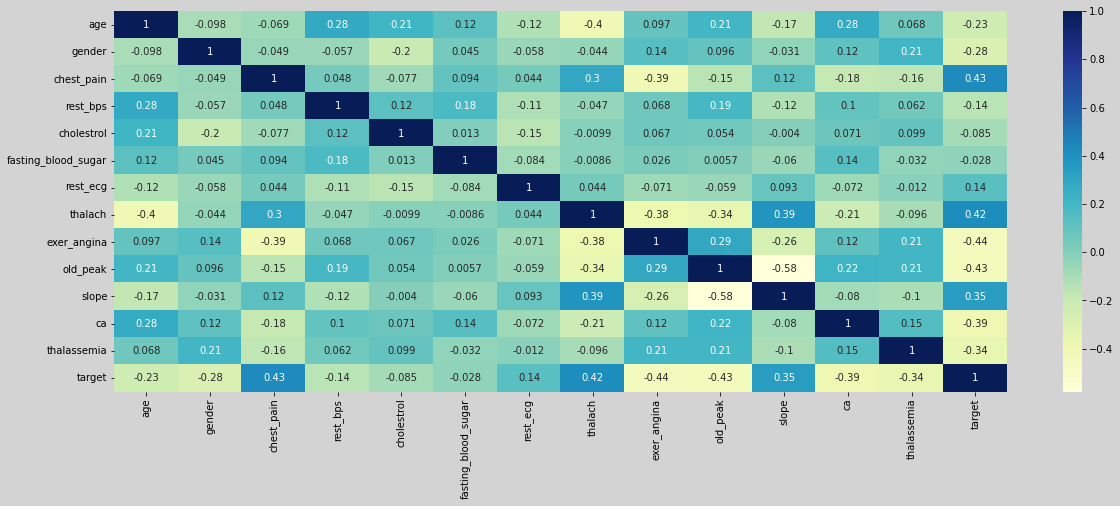

In [9]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='YlGnBu');
plt.show()

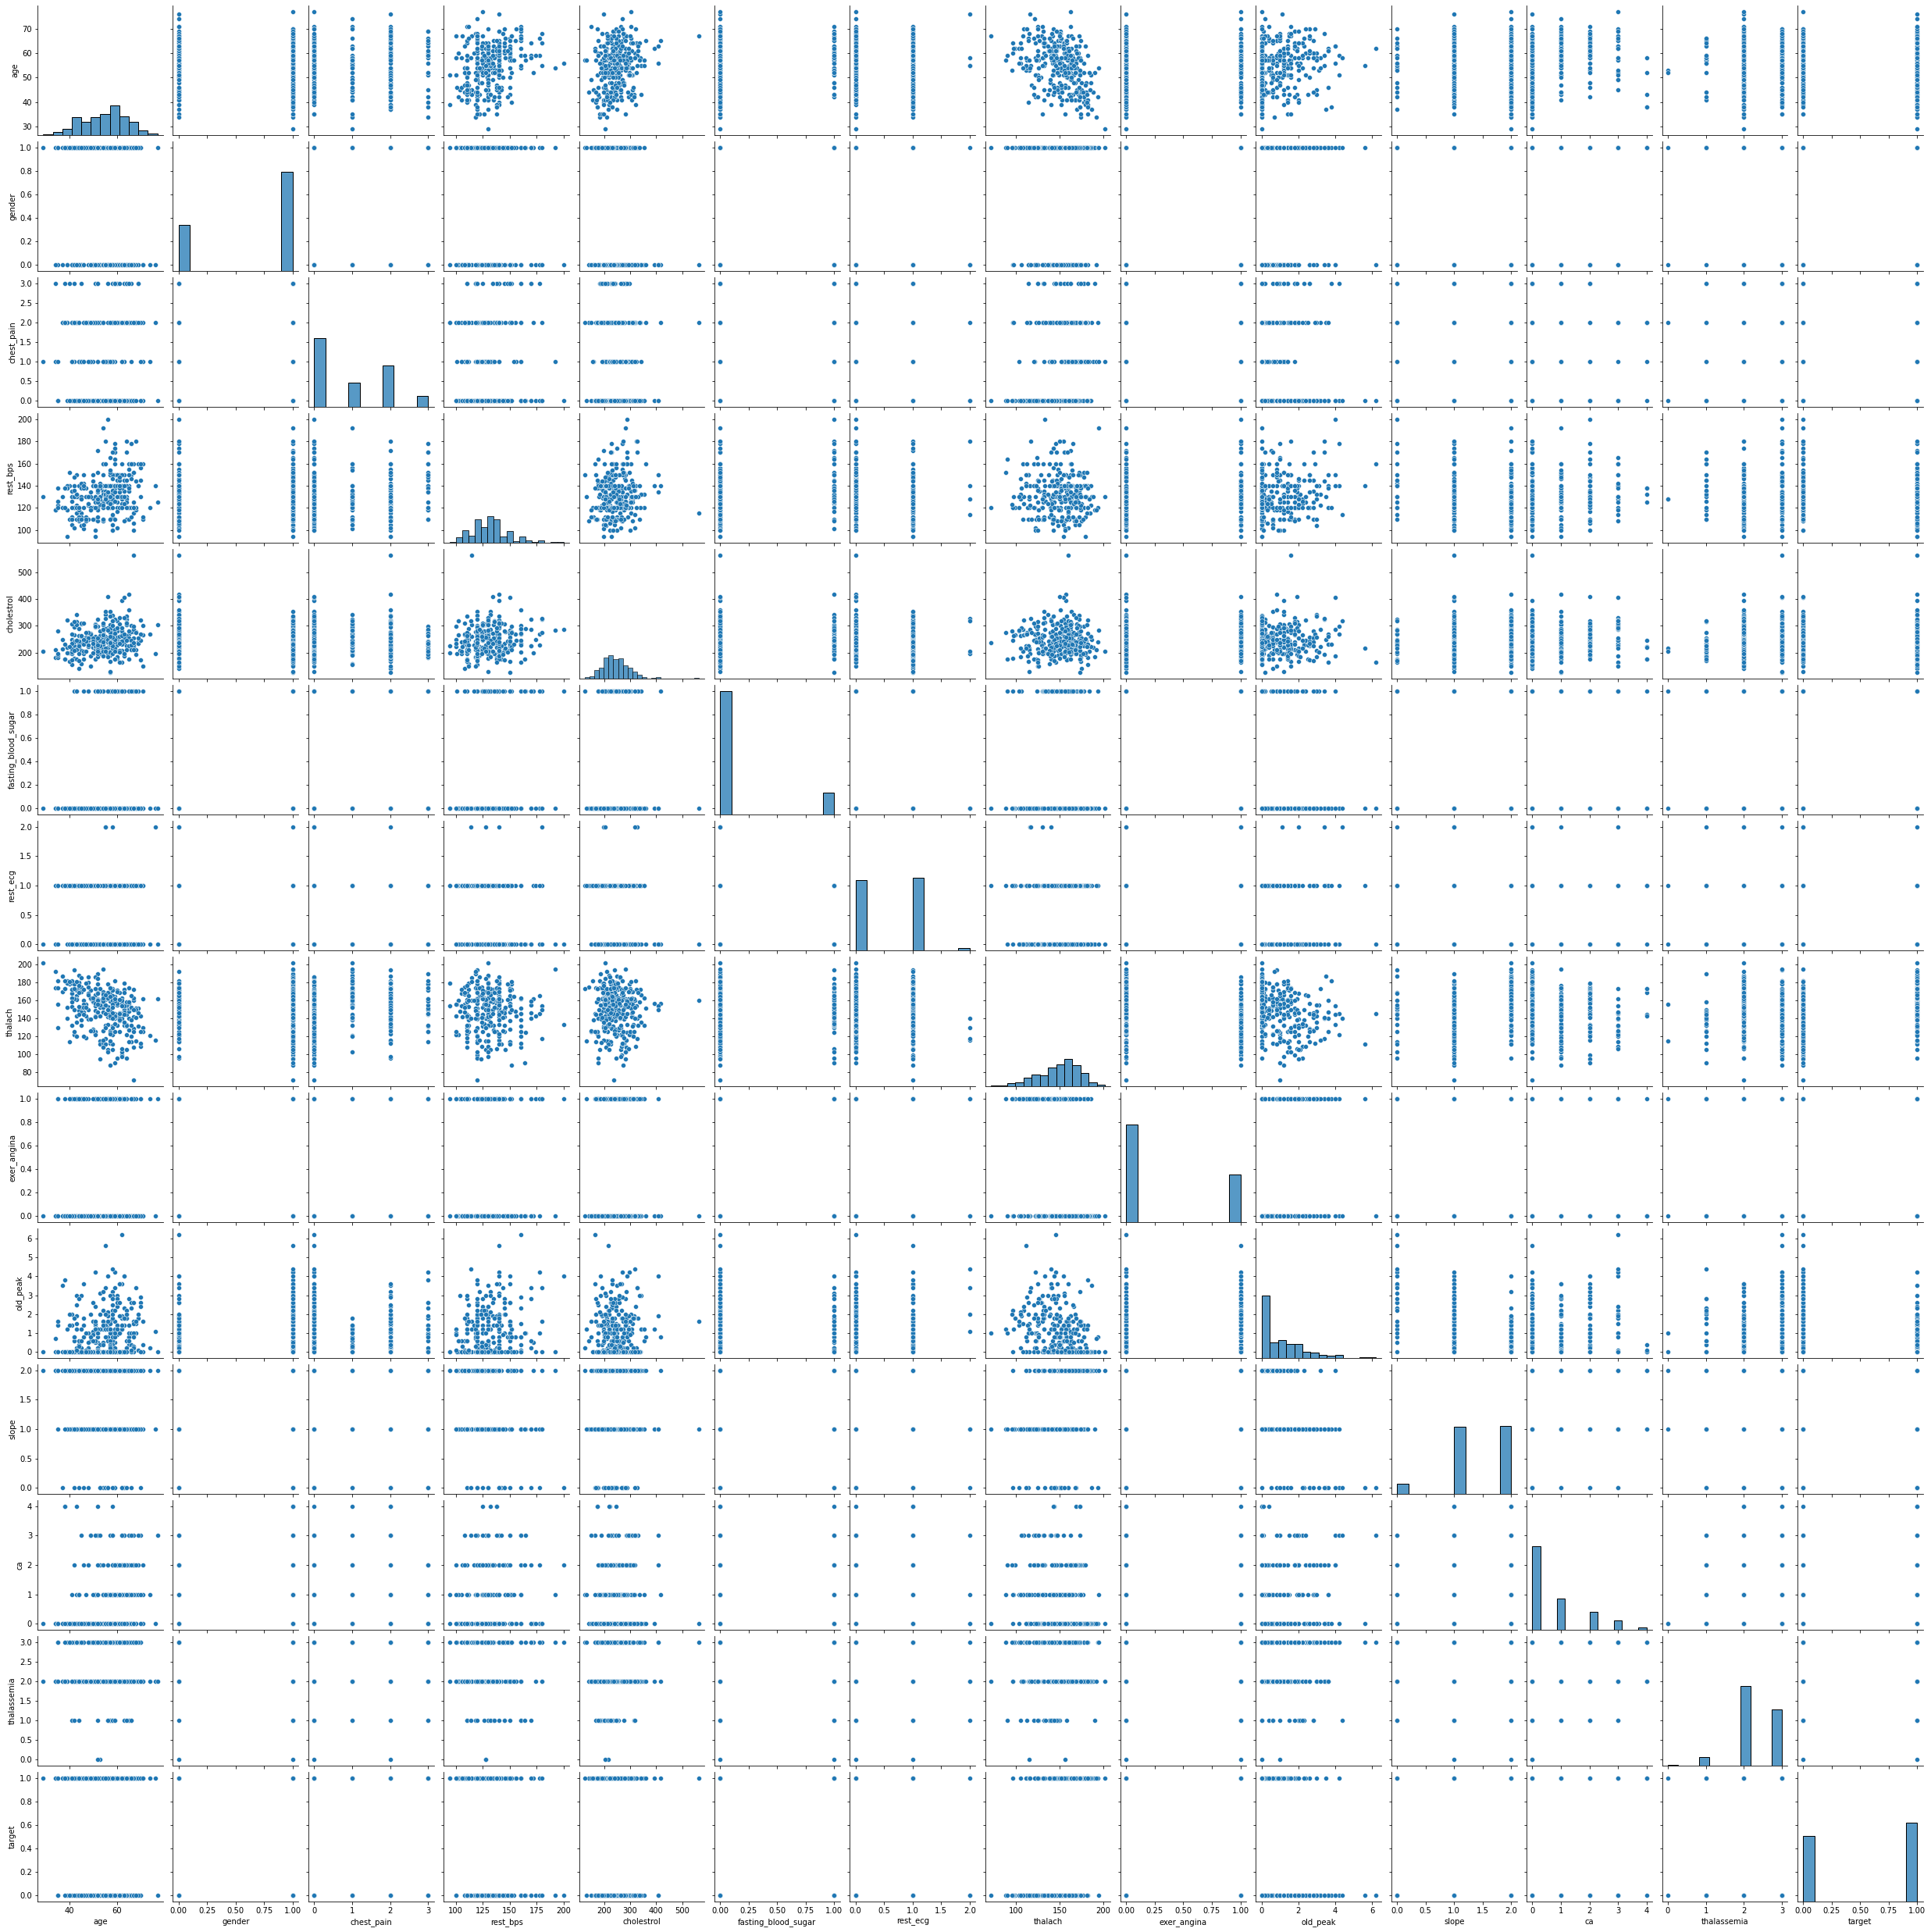

In [10]:
sns.pairplot(df);

# visualization using seaborn

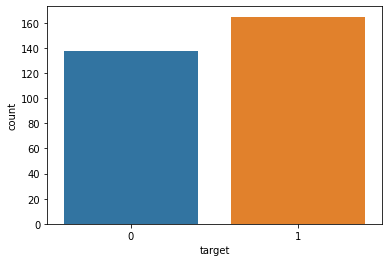

In [11]:
sns.countplot(df['target']);

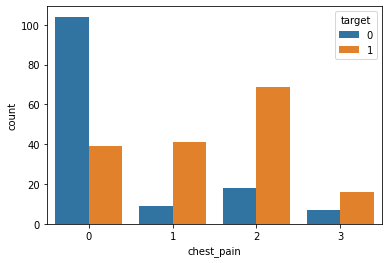

In [12]:
sns.countplot(df['chest_pain'],hue=df['target']);

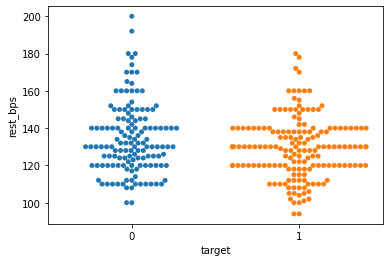

In [13]:
sns.swarmplot(x="target", y="rest_bps", data=df);

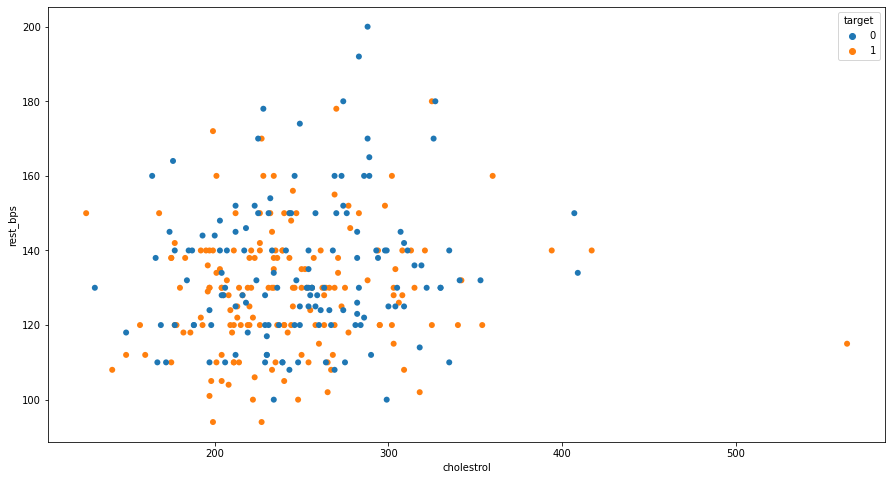

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="cholestrol", y="rest_bps",hue="target",linewidth=0,data=df);

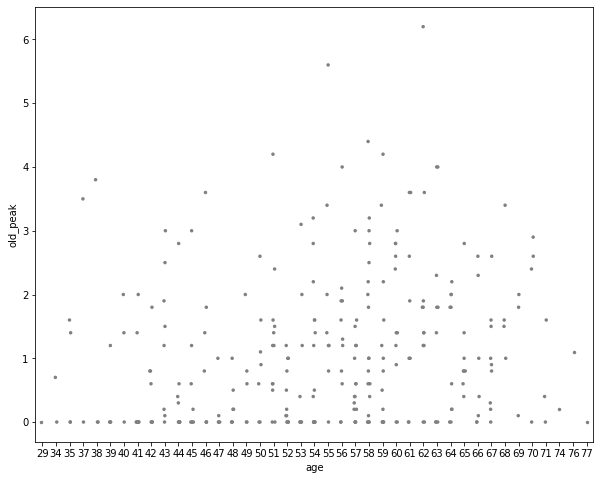

In [15]:
plt.figure(figsize=(10,8))
sns.stripplot(x="age", y="old_peak", data=df, size=3.5, color=".50",linewidth=0);

# outliers removal using IQR

In [16]:
def removeOutliers(df, col):
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1
     
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = df.loc[df[col].isin(outlier_free_list)]
 
 
for i in df.columns:
    removeOutliers(df, i)
 
# Assigning filtered data back to our original variable
df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column age is: 13.5
IQR value for column gender is: 1.0
IQR value for column chest_pain is: 2.0
IQR value for column rest_bps is: 20.0
IQR value for column cholestrol is: 63.5
IQR value for column fasting_blood_sugar is: 0.0
IQR value for column rest_ecg is: 1.0
IQR value for column thalach is: 32.5
IQR value for column exer_angina is: 1.0
IQR value for column old_peak is: 1.6
IQR value for column slope is: 1.0
IQR value for column ca is: 1.0
IQR value for column thalassemia is: 1.0
IQR value for column target is: 1.0
Shape of data after outlier removal is:  (303, 14)


# creating target and response variable for model building

In [17]:
y_dep = df.target 
x_ind = df.drop('target', axis=1)

## NORMALIZATION OF RESPONSE VARIABLE

In [18]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()

In [19]:
x_norm=norm.fit_transform(x_ind)

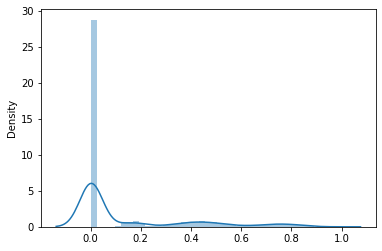

In [20]:
sns.distplot(x_norm);

# model data selection for train and validation phase

In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=2)

# Binary classification problem so am opted LOGISTICS REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [23]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=model1.predict(x_test)

In [25]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

# CONFUSION MATRIX AND ACCURACY OF LOGISTICS REGRESSION

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [27]:
cnf=confusion_matrix(y_test,y_pred)

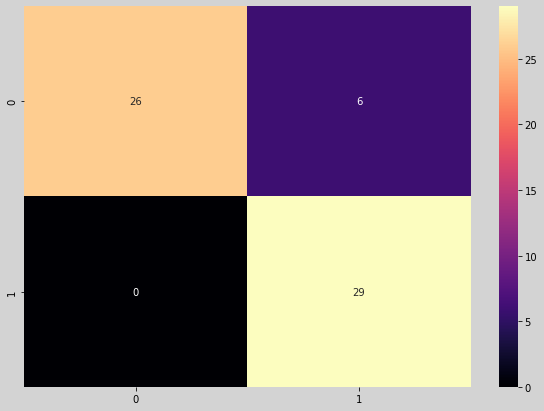

In [28]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='magma');
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [29]:
accuracy_score(y_test,y_pred) * 100

90.1639344262295

# RoC curve (Receiver operating characteristic curve)
# ROC is used to find the threshold point

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [31]:
logis_roc_auc=roc_auc_score(y_test,y_pred)

In [32]:
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])

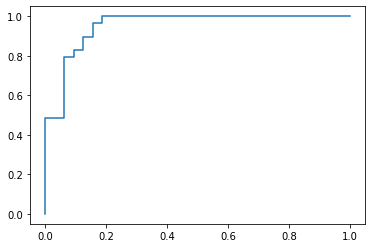

In [33]:
plt.plot(fpr,tpr,logis_roc_auc);

In [37]:
roc_t=LogisticRegression(class_weight="balanced")
roc_t.fit(x_train,y_train)
THRESHOLD=0.5

In [38]:
y_pred_roc=np.where(roc_t.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [39]:
accuracy_score(y_test,y_pred_roc) * 100

90.1639344262295

# CLASSIFICATION REPORT

In [40]:
from sklearn.metrics import classification_report

In [41]:
c_Report=classification_report(y_test,y_pred_roc)

In [42]:
print(c_Report)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.